# İstanbul kiralık ev fiyat tahmin modeli

### Verilerin Okunması

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sea 
import matplotlib.pyplot as plot

In [2]:
df_raw = pd.read_csv("istanbul_kiralik_ev_ilanlari.csv")
df_raw.head(5)

,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 3,celly 4,eids-badge__description,he-lazy-image src,eids-badge__label,list-view-location,img-wrp href,he-lazy-image src 2,he-lazy-image src 3,wp-btn,listing-card--owner-info__firm-name,listing-card--owner-info__name,list-view-header
0,https://www.hepsiemlak.com/istanbul-kadikoy-ca...,31.0,350.000,18-05-2025,Kiralık Daire,5 +\n 2,360 m²,6\n Yaşında,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,İstanbul / Kadıköy / Caddebostan Mah.,https://www.hepsiemlak.com/emlak-ofisi/versati...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Whatsapp,Versatıe Selenıum Twins Zorlu Center,Sinan\n Çizmeci,NaN
1,https://www.hepsiemlak.com/istanbul-sisli-tesv...,13.0,125.000,18-05-2025,Kiralık Residence,1 +\n 1,90 m²,Sıfır Bina,8. Kat,NaN,https://hecdnnw.hemlak.com/mncropresize/77/67/...,NaN,İstanbul / Şişli / Teşvikiye Mah.,https://www.hepsiemlak.com/emlak-ofisi/versati...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,NaN,Whatsapp,Versatıe Selenıum Twins Zorlu Center,Sinan\n Çizmeci,NaN
2,https://www.hepsiemlak.com/istanbul-bagcilar-1...,25.0,29.990,18-05-2025,Kiralık Daire,1 +\n 1,75 m²,Sıfır Bina,1. Kat,NaN,https://hecdnnw.hemlak.com/mncropresize/77/67/...,NaN,İstanbul / Bağcılar / 15 Temmuz Mah.,https://www.hepsiemlak.com/emlak-ofisi/uzmanla...,NaN,NaN,Whatsapp,Uzmanlar Gayrimenkul,NaN,NaN
3,https://www.hepsiemlak.com/istanbul-kagithane-...,23.0,26.500,18-05-2025,Kiralık Daire,2 +\n 1,95 m²,5\n Yaşında,1. Kat,NaN,https://hecdn01.hemlak.com/mncropresize/280/21...,NaN,İstanbul / Kağıthane / Sultan Selim Mah.,https://www.hepsiemlak.com/emlak-ofisi/serhat-...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Whatsapp,Serhat İnşaat Ve Gayrimenkul,Serhat\n Durmazer,NaN
4,https://www.hepsiemlak.com/istanbul-zeytinburn...,29.0,150.000,17-05-2025,Kiralık Daire,3 +\n 1,183 m²,3\n Yaşında,10. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/mncropresize/280/21...,EİDS onaylı,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,https://www.hepsiemlak.com/emlak-ofisi/kurtulu...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Whatsapp,Kurtuluş Emlak,NaN,NaN


In [3]:
col = list(df_raw.columns)


In [4]:
df_raw.drop(['img-link href','photo-count','left','eids-badge__description','he-lazy-image src','eids-badge__label','img-wrp href','he-lazy-image src 2','he-lazy-image src 3','wp-btn','listing-card--owner-info__firm-name','listing-card--owner-info__name','list-view-header'],axis=1,inplace=True)


In [5]:
df_raw.sample(10)

,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location
3268,85.000,07-05-2025,2 +\n 1,90 m²,30\n Yaşında,1. Kat,İstanbul / Beşiktaş / Bebek Mah.
861,12.000,14-05-2025,2 +\n 1,90 m²,21\n Yaşında,5. Kat,İstanbul / Küçükçekmece / Yeşilova Mah.
2818,10.000,08-05-2025,Stüdyo,43 m²,47\n Yaşında,3. Kat,İstanbul / Büyükçekmece / Kamiloba Mah.
855,170.000,16-05-2025,5 +\n 2,400 m²,23\n Yaşında,4. Kat,İstanbul / Bakırköy / Yeşilköy Mah.
3488,16.000,04-05-2025,2 +\n 1,90 m²,25\n Yaşında,2. Kat,İstanbul / Avcılar / Cihangir Mah.
3274,35.000,05-05-2025,1 +\n 1,60 m²,40\n Yaşında,1. Kat,İstanbul / Kadıköy / Rasimpaşa Mah.
4598,20.000,07-05-2025,3 +\n 1,140 m²,26\n Yaşında,3. Kat,İstanbul / Silivri / Alibey Mah.
1541,150.000,10-05-2025,3 +\n 1,160 m²,40\n Yaşında,Bahçe Katı,İstanbul / Beşiktaş / Ulus Mah.
1005,40.000,18-05-2025,3 +\n 1,150 m²,28\n Yaşında,3. Kat,İstanbul / Maltepe / Feyzullah Mah.
5870,21.500,27-04-2025,2 +\n 1,90 m²,40\n Yaşında,4. Kat,İstanbul / Fatih / Haseki Sultan Mah.


In [6]:
df_raw['oda_sayisi']=df_raw['celly'].apply(lambda x: str(x).split(sep='+')[0])
df_raw['banyo_mutfak_sayisi']=df_raw['celly'].apply(lambda x: str(x).split(sep='+')[-1])
df_raw.head(5)

,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location,oda_sayisi,banyo_mutfak_sayisi
0,350.000,18-05-2025,5 +\n 2,360 m²,6\n Yaşında,4. Kat,İstanbul / Kadıköy / Caddebostan Mah.,5,\n 2
1,125.000,18-05-2025,1 +\n 1,90 m²,Sıfır Bina,8. Kat,İstanbul / Şişli / Teşvikiye Mah.,1,\n 1
2,29.990,18-05-2025,1 +\n 1,75 m²,Sıfır Bina,1. Kat,İstanbul / Bağcılar / 15 Temmuz Mah.,1,\n 1
3,26.500,18-05-2025,2 +\n 1,95 m²,5\n Yaşında,1. Kat,İstanbul / Kağıthane / Sultan Selim Mah.,2,\n 1
4,150.000,17-05-2025,3 +\n 1,183 m²,3\n Yaşında,10. Kat,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,3,\n 1


In [7]:
df_raw['ilce']=df_raw['list-view-location'].apply(lambda x: str(x).split(sep=('/'))[1])
df_raw['mahalle']=df_raw['list-view-location'].apply(lambda x: str(x).split(sep=('/'))[-1])
df_raw.head(5)

,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle
0,350.000,18-05-2025,5 +\n 2,360 m²,6\n Yaşında,4. Kat,İstanbul / Kadıköy / Caddebostan Mah.,5,\n 2,Kadıköy,Caddebostan Mah.
1,125.000,18-05-2025,1 +\n 1,90 m²,Sıfır Bina,8. Kat,İstanbul / Şişli / Teşvikiye Mah.,1,\n 1,Şişli,Teşvikiye Mah.
2,29.990,18-05-2025,1 +\n 1,75 m²,Sıfır Bina,1. Kat,İstanbul / Bağcılar / 15 Temmuz Mah.,1,\n 1,Bağcılar,15 Temmuz Mah.
3,26.500,18-05-2025,2 +\n 1,95 m²,5\n Yaşında,1. Kat,İstanbul / Kağıthane / Sultan Selim Mah.,2,\n 1,Kağıthane,Sultan Selim Mah.
4,150.000,17-05-2025,3 +\n 1,183 m²,3\n Yaşında,10. Kat,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.


In [8]:
df_raw['kat']=df_raw['celly 4'].apply(lambda x: str(x).split(sep='.')[0])
df_raw['yas']=df_raw['celly 3'].apply(lambda x: str(x).split(sep=' ')[0])
df_raw['metre_kare']=df_raw['celly 2'].apply(lambda x: str(x).split(sep=' ')[0])
df_raw['fiyat']=df_raw['list-view-price']
df_raw.head(5)


,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
0,350.000,18-05-2025,5 +\n 2,360 m²,6\n Yaşında,4. Kat,İstanbul / Kadıköy / Caddebostan Mah.,5,\n 2,Kadıköy,Caddebostan Mah.,4,6\n,360,350.000
1,125.000,18-05-2025,1 +\n 1,90 m²,Sıfır Bina,8. Kat,İstanbul / Şişli / Teşvikiye Mah.,1,\n 1,Şişli,Teşvikiye Mah.,8,Sıfır,90,125.000
2,29.990,18-05-2025,1 +\n 1,75 m²,Sıfır Bina,1. Kat,İstanbul / Bağcılar / 15 Temmuz Mah.,1,\n 1,Bağcılar,15 Temmuz Mah.,1,Sıfır,75,29.990
3,26.500,18-05-2025,2 +\n 1,95 m²,5\n Yaşında,1. Kat,İstanbul / Kağıthane / Sultan Selim Mah.,2,\n 1,Kağıthane,Sultan Selim Mah.,1,5\n,95,26.500
4,150.000,17-05-2025,3 +\n 1,183 m²,3\n Yaşında,10. Kat,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.,10,3\n,183,150.000


In [9]:
df_raw.columns

Index(['list-view-price', 'list-view-date', 'celly', 'celly 2', 'celly 3',
       'celly 4', 'list-view-location', 'oda_sayisi', 'banyo_mutfak_sayisi',
       'ilce', 'mahalle', 'kat', 'yas', 'metre_kare', 'fiyat'],
      dtype='object')

In [10]:
df_raw.drop(['list-view-price', 'list-view-date', 'celly 2', 'celly 3', 'celly 4','list-view-location'],axis=1, inplace=True)

In [11]:
df_raw.head(5)

,celly,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
0,5 +\n 2,5,\n 2,Kadıköy,Caddebostan Mah.,4,6\n,360,350.000
1,1 +\n 1,1,\n 1,Şişli,Teşvikiye Mah.,8,Sıfır,90,125.000
2,1 +\n 1,1,\n 1,Bağcılar,15 Temmuz Mah.,1,Sıfır,75,29.990
3,2 +\n 1,2,\n 1,Kağıthane,Sultan Selim Mah.,1,5\n,95,26.500
4,3 +\n 1,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.,10,3\n,183,150.000


In [12]:
df_raw['fiyat']=df_raw['fiyat'].apply(lambda x: str(x).replace(".",""))
df_raw['fiyat']=df_raw['fiyat'].apply(lambda x: str(x).replace(" ",""))
df_raw['fiyat']=pd.to_numeric(df_raw['fiyat'])
df_raw.head(5)

,celly,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
0,5 +\n 2,5,\n 2,Kadıköy,Caddebostan Mah.,4,6\n,360,350000
1,1 +\n 1,1,\n 1,Şişli,Teşvikiye Mah.,8,Sıfır,90,125000
2,1 +\n 1,1,\n 1,Bağcılar,15 Temmuz Mah.,1,Sıfır,75,29990
3,2 +\n 1,2,\n 1,Kağıthane,Sultan Selim Mah.,1,5\n,95,26500
4,3 +\n 1,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.,10,3\n,183,150000


In [13]:
df_raw['metre_kare']=df_raw['metre_kare'].apply(lambda x: str(x).replace(".",""))
df_raw['metre_kare']=df_raw['metre_kare'].apply(lambda x: str(x).replace(" ",""))
df_raw['metre_kare']=pd.to_numeric(df_raw['metre_kare'])

In [14]:
df_raw['yas']=df_raw['yas'].apply(lambda x:0 if x =='Sıfır' else x)


In [15]:
df_raw['yas']=df_raw['yas'].apply(lambda x: str(x).replace(".",""))
df_raw['yas']=df_raw['yas'].apply(lambda x: str(x).replace(" ",""))
df_raw['yas']=pd.to_numeric(df_raw['yas'])

In [16]:
df_raw['kat'].unique()

array(['4', '8', '1', '10', '21 ve üzeri', 'Bahçe Katı', '6', 'nan',
       'Kot 2', '2', '17', '3', '13', 'Yüksek Giriş', '5', 'Ara Kat', '7',
       '12', '9', 'Yarı Bodrum', 'En Üst Kat', 'Giriş Katı', 'Teras Katı',
       'Kot 1', '11', 'Zemin', '15', '14', '16', '19', 'Çatı Katı',
       'Bodrum', 'Kot 3', '20', '18', 'Bodrum ve Zemin', 'Villa Katı',
       'Asma Kat'], dtype=object)

In [17]:
df_raw['kat'].replace(regex=[r'^Bahçe Katı','Yüksek Giriş','Yarı Bodrum','Giriş Katı','Zemin','Bodrum ve Zemin'], value=0,inplace=True)
df_raw['kat'].unique()

C:\Users\ebinm\AppData\Local\Temp\ipykernel_14104\1533926748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['kat'].replace(regex=[r'^Bahçe Katı','Yüksek Giriş','Yarı Bodrum','Giriş Katı','Zemin','Bodrum ve Zemin'], value=0,inplace=True)


array(['4', '8', '1', '10', '21 ve üzeri', 0, '6', 'nan', 'Kot 2', '2',
       '17', '3', '13', '5', 'Ara Kat', '7', '12', '9', 'En Üst Kat',
       'Teras Katı', 'Kot 1', '11', '15', '14', '16', '19', 'Çatı Katı',
       'Bodrum', 'Kot 3', '20', '18', 'Villa Katı', 'Asma Kat'],
      dtype=object)

In [18]:
df_raw['kat'].replace(regex=[r'^Kot 2'], value=-2,inplace=True)
df_raw['kat'].replace(regex=[r'^Kot 1','Bodrum'], value=-1,inplace=True)
df_raw['kat'].replace(regex=[r'^Kot 3'], value=-3,inplace=True)
df_raw['kat'].replace(regex=[r'^Villa Katı'], value=1,inplace=True)
df_raw['kat'].replace(regex=[r'^21 ve üzeri'], value=20,inplace=True)
df_raw['kat'].replace(regex=[r'^En Üst Kat','Teras Katı','Asma Kat','Çatı Katı','nan','Ara Kat'], value=9,inplace=True)
df_raw['kat'].unique()

array(['4', '8', '1', '10', 20, 0, '6', 9, -2, '2', '17', '3', '13', '5',
       '7', '12', '9', -1, '11', '15', '14', '16', '19', -3, '20', '18',
       1], dtype=object)

In [19]:
df_raw['kat']=pd.to_numeric(df_raw['kat'])


In [20]:
df_raw['banyo_mutfak_sayisi'].unique()
df_raw['oda_sayisi'].unique()
df_raw['oda_sayisi'].replace(regex=[r'^Stüdyo'],value=0,inplace=True)
df_raw['banyo_mutfak_sayisi'].replace(regex=[r'^Stüdyo'],value=0,inplace=True)

C:\Users\ebinm\AppData\Local\Temp\ipykernel_14104\139104790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['oda_sayisi'].replace(regex=[r'^Stüdyo'],value=0,inplace=True)
C:\Users\ebinm\AppData\Local\Temp\ipykernel_14104\139104790.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [21]:
df_raw['oda_sayisi']=pd.to_numeric(df_raw['oda_sayisi'])
df_raw['banyo_mutfak_sayisi']=pd.to_numeric(df_raw['banyo_mutfak_sayisi'])

In [22]:
df_raw.sample(15)

,celly,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
4511,3 +\n 1,3,1,Adalar,Maden Mah.,5,22,140,100000
5974,Stüdyo,0,0,Sarıyer,Maslak Mah.,20,7,65,40000
3649,3 +\n 1,3,1,Avcılar,Ambarlı Mah.,4,30,155,18000
5412,3 +\n 1,3,1,Beşiktaş,Bebek Mah.,9,21,390,290000
1543,1 +\n 1,1,1,Eyüpsultan,Yeşilpınar Mah.,0,3,65,22000
4668,2 +\n 1,2,1,Fatih,Haseki Sultan Mah.,3,45,90,20500
5851,3 +\n 1,3,1,Beykoz,Çamlıbahçe Mah.,0,25,110,20000
1927,3 +\n 1,3,1,Kadıköy,Erenköy Mah.,3,44,160,55000
2531,2 +\n 1,2,1,Kartal,Hürriyet Mah.,0,28,90,20000
5417,2 +\n 1,2,1,Ataşehir,Barbaros Mah.,19,15,129,58000


In [23]:
df_raw.describe()

,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat
count,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6.006000e+03
mean,2.137030,1.037796,3.996503,20.860306,113.285048,4.847762e+04
std,1.304334,2.901675,4.298770,16.010164,99.144200,8.729877e+04
min,0.000000,0.000000,-3.000000,0.000000,10.000000,1.500000e+03
25%,1.000000,1.000000,1.000000,8.000000,75.000000,2.000000e+04
50%,2.000000,1.000000,3.000000,20.000000,95.000000,3.000000e+04
75%,3.000000,1.000000,6.000000,30.000000,125.000000,5.000000e+04
max,31.000000,223.000000,20.000000,386.000000,3804.000000,3.300000e+06


In [24]:
df_raw.columns


Index(['celly', 'oda_sayisi', 'banyo_mutfak_sayisi', 'ilce', 'mahalle', 'kat',
       'yas', 'metre_kare', 'fiyat'],
      dtype='object')

In [25]:
df_raw.describe()

,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat
count,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6.006000e+03
mean,2.137030,1.037796,3.996503,20.860306,113.285048,4.847762e+04
std,1.304334,2.901675,4.298770,16.010164,99.144200,8.729877e+04
min,0.000000,0.000000,-3.000000,0.000000,10.000000,1.500000e+03
25%,1.000000,1.000000,1.000000,8.000000,75.000000,2.000000e+04
50%,2.000000,1.000000,3.000000,20.000000,95.000000,3.000000e+04
75%,3.000000,1.000000,6.000000,30.000000,125.000000,5.000000e+04
max,31.000000,223.000000,20.000000,386.000000,3804.000000,3.300000e+06


In [26]:
df_raw.columns

Index(['celly', 'oda_sayisi', 'banyo_mutfak_sayisi', 'ilce', 'mahalle', 'kat',
       'yas', 'metre_kare', 'fiyat'],
      dtype='object')

In [27]:
df_raw['yas'].apply(lambda x:df_raw['yas'].mean if x>80 else x)

0       6
1       0
2       0
3       5
4       3
       ..
6001    1
6002    7
6003    5
6004    7
6005    1
Name: yas, Length: 6006, dtype: object

<Axes: xlabel='yas'>

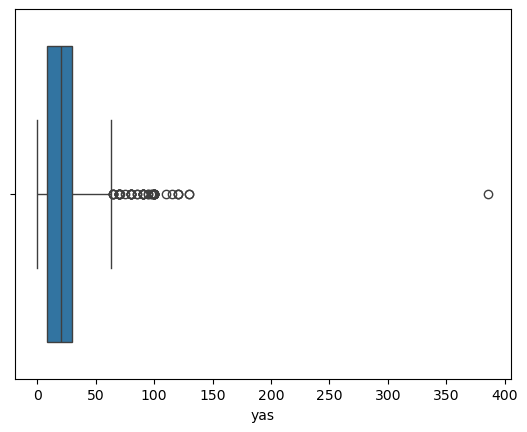

In [28]:
sea.boxplot(x=df_raw['yas'])

In [29]:
Q1 = df_raw['yas'].quantile(0.25)
Q3 = df_raw['yas'].quantile(0.75)
IQR = Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
print(alt_sinir,ust_sinir)

-25.0 63.0


In [30]:
df_raw['yas']=df_raw['yas'].apply(lambda x:df_raw['yas'].mean if x > ust_sinir else x)

<Axes: xlabel='kat', ylabel='Count'>

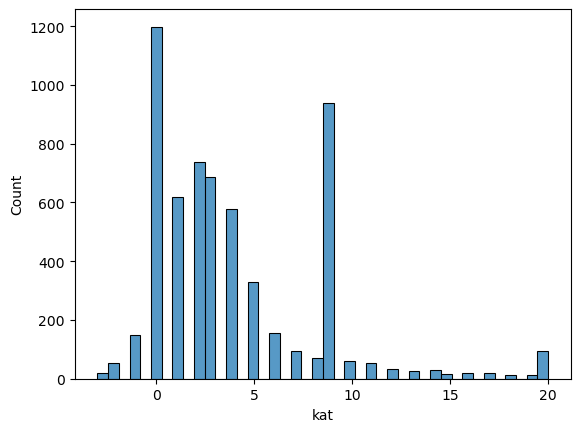

In [ ]:
sea.histplot(df_raw['kat'])

<Axes: xlabel='oda_sayisi', ylabel='Count'>

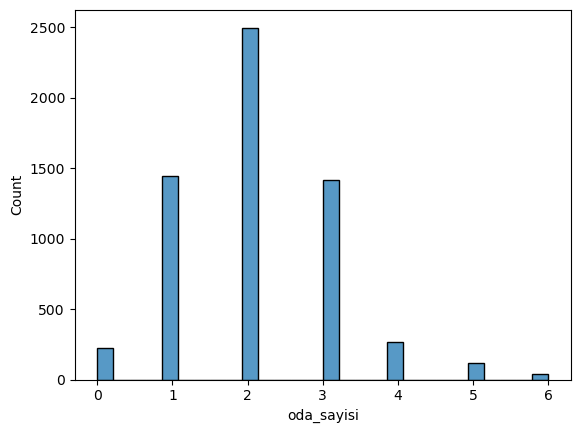

In [ ]:
sea.histplot(df_raw['oda_sayisi'])

In [ ]:
Q1 = df_raw['oda_sayisi'].quantile(0.25)
Q3 = df_raw['oda_sayisi'].quantile(0.75)
IOR= Q3-Q1
alt_sinir=Q1-1.5*IOR
ust_sinir=Q3+1.5*IOR
print(ust_sinir)

6.0


In [ ]:
df_raw['oda_sayisi']=df_raw['oda_sayisi'].apply(lambda x:df_raw['oda_sayisi'].mean if x > ust_sinir else x)


<Axes: ylabel='oda_sayisi'>

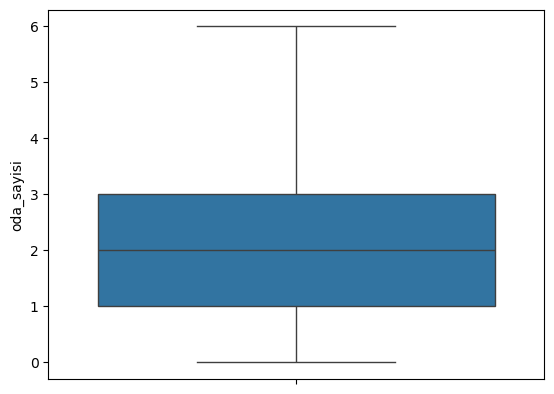

In [ ]:
sea.boxplot(df_raw['oda_sayisi'])

<Axes: ylabel='banyo_mutfak_sayisi'>

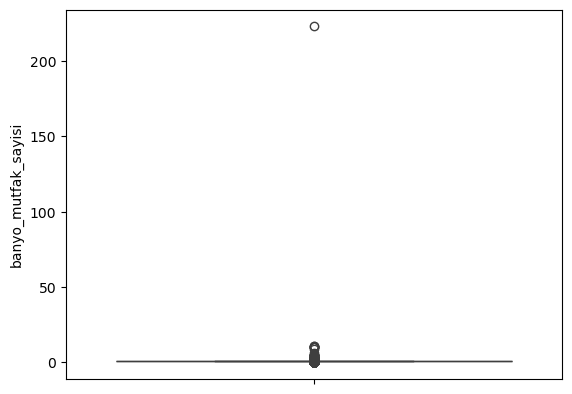

In [ ]:
sea.boxplot(df_raw['banyo_mutfak_sayisi'])

In [ ]:
Q1 = df_raw['banyo_mutfak_sayisi'].quantile(0.25)
Q3 = df_raw['banyo_mutfak_sayisi'].quantile(0.75)
ior=Q3-Q1
ust_sinir=Q3+1.5*ior
df_raw['banyo_mutfak_sayisi']=df_raw['banyo_mutfak_sayisi'].apply(lambda x:df_raw['banyo_mutfak_sayisi'].mean if x > ust_sinir else x)

<Axes: xlabel='banyo_mutfak_sayisi', ylabel='Count'>

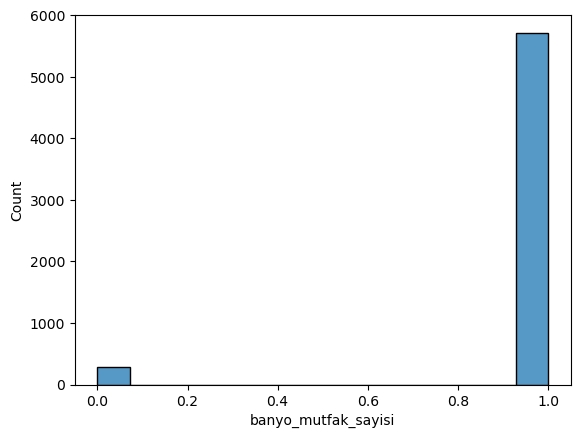

In [ ]:
sea.histplot(df_raw['banyo_mutfak_sayisi'])

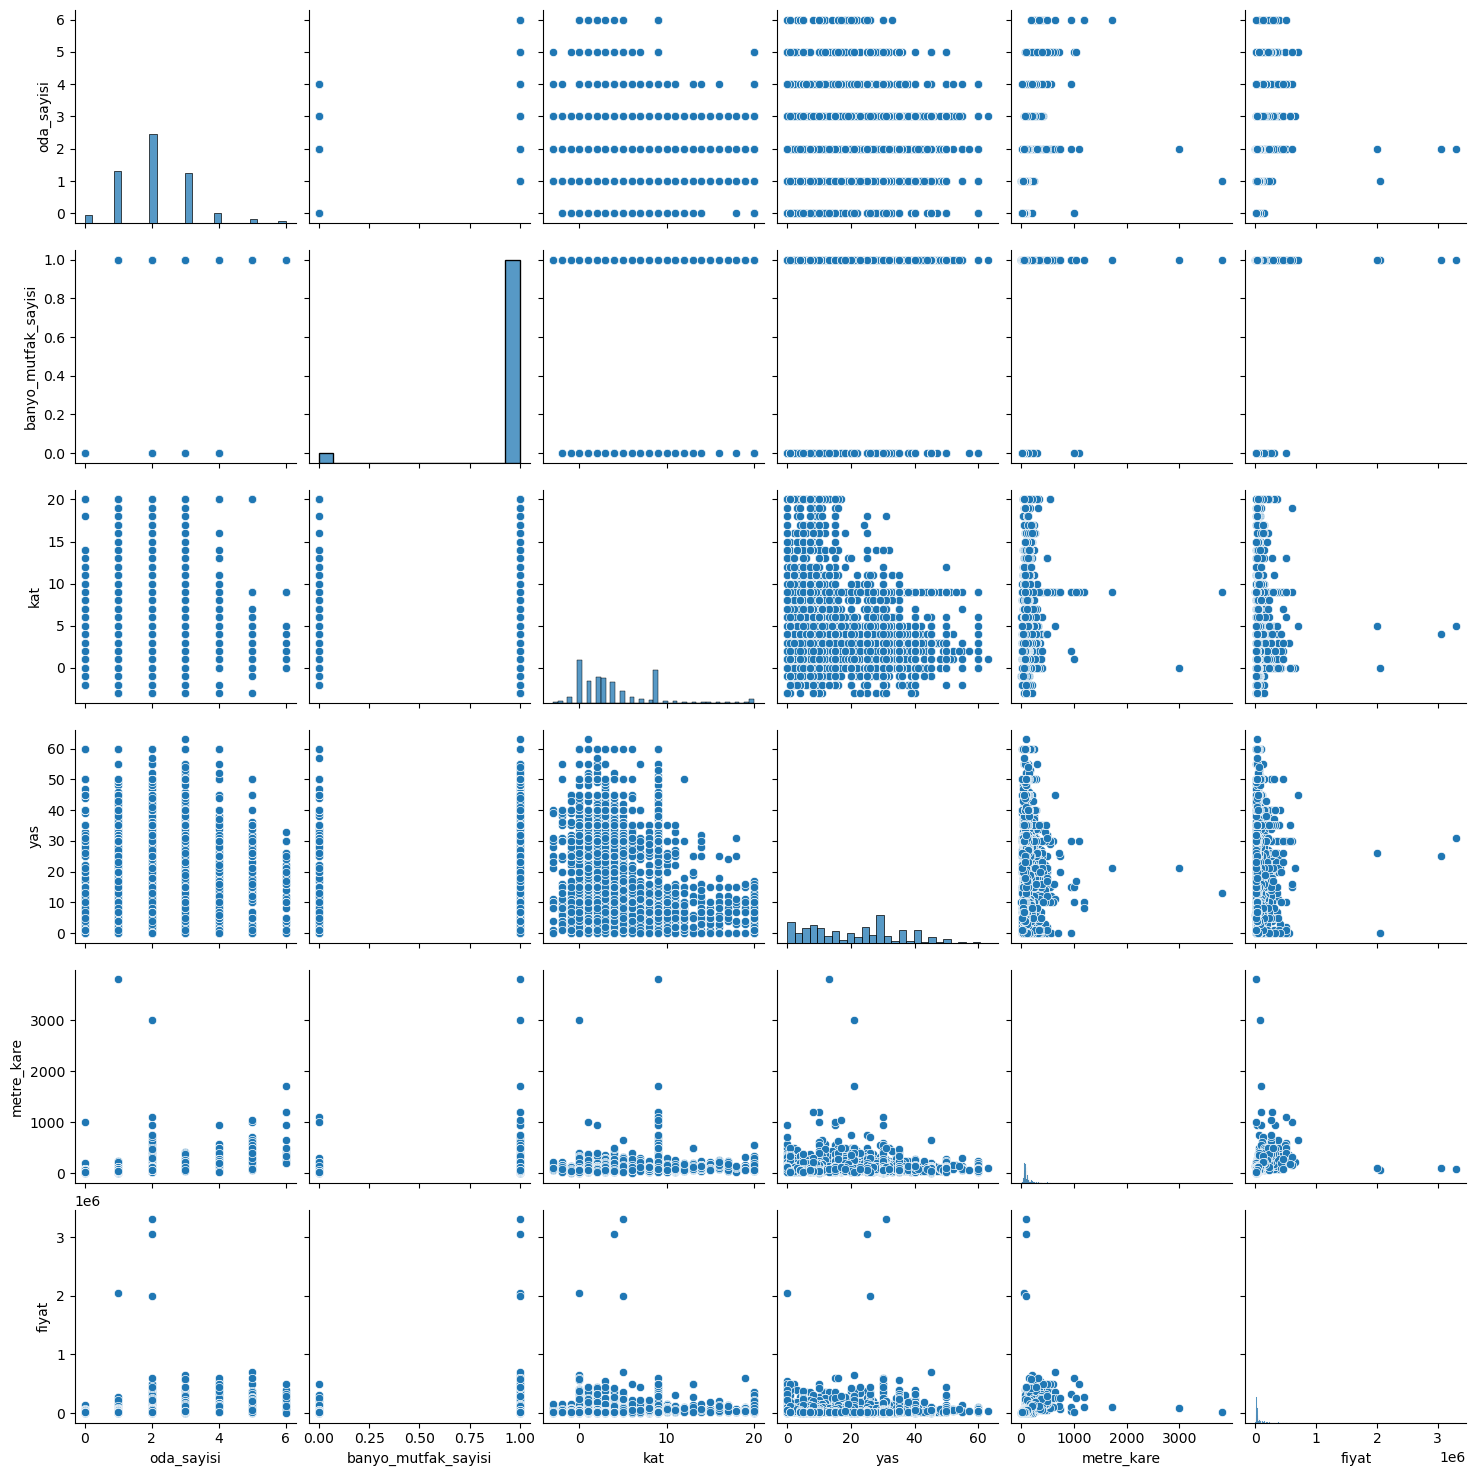

In [ ]:
sea.pairplot(df_raw)

In [ ]:
Q1 = df_raw['fiyat'].quantile(0.25)
Q3 = df_raw['fiyat'].quantile(0.75)
IOR = Q3-Q1
ust = Q3+1.5*IOR
print(ust)

95000.0


In [ ]:
df_raw['fiyat']= df_raw['fiyat'].apply(lambda x:df_raw['fiyat'].mean if x>ust else x)

In [ ]:
Q1 = df_raw['metre_kare'].quantile(0.25)
Q3 = df_raw['metre_kare'].quantile(0.75)
IOR = Q3-Q1
ust = Q3+1.5*IOR
print(ust)

200.0


In [ ]:
df_raw['metre_kare']= df_raw['metre_kare'].apply(lambda x:df_raw['metre_kare'].mean if x>1.5*ust else x)

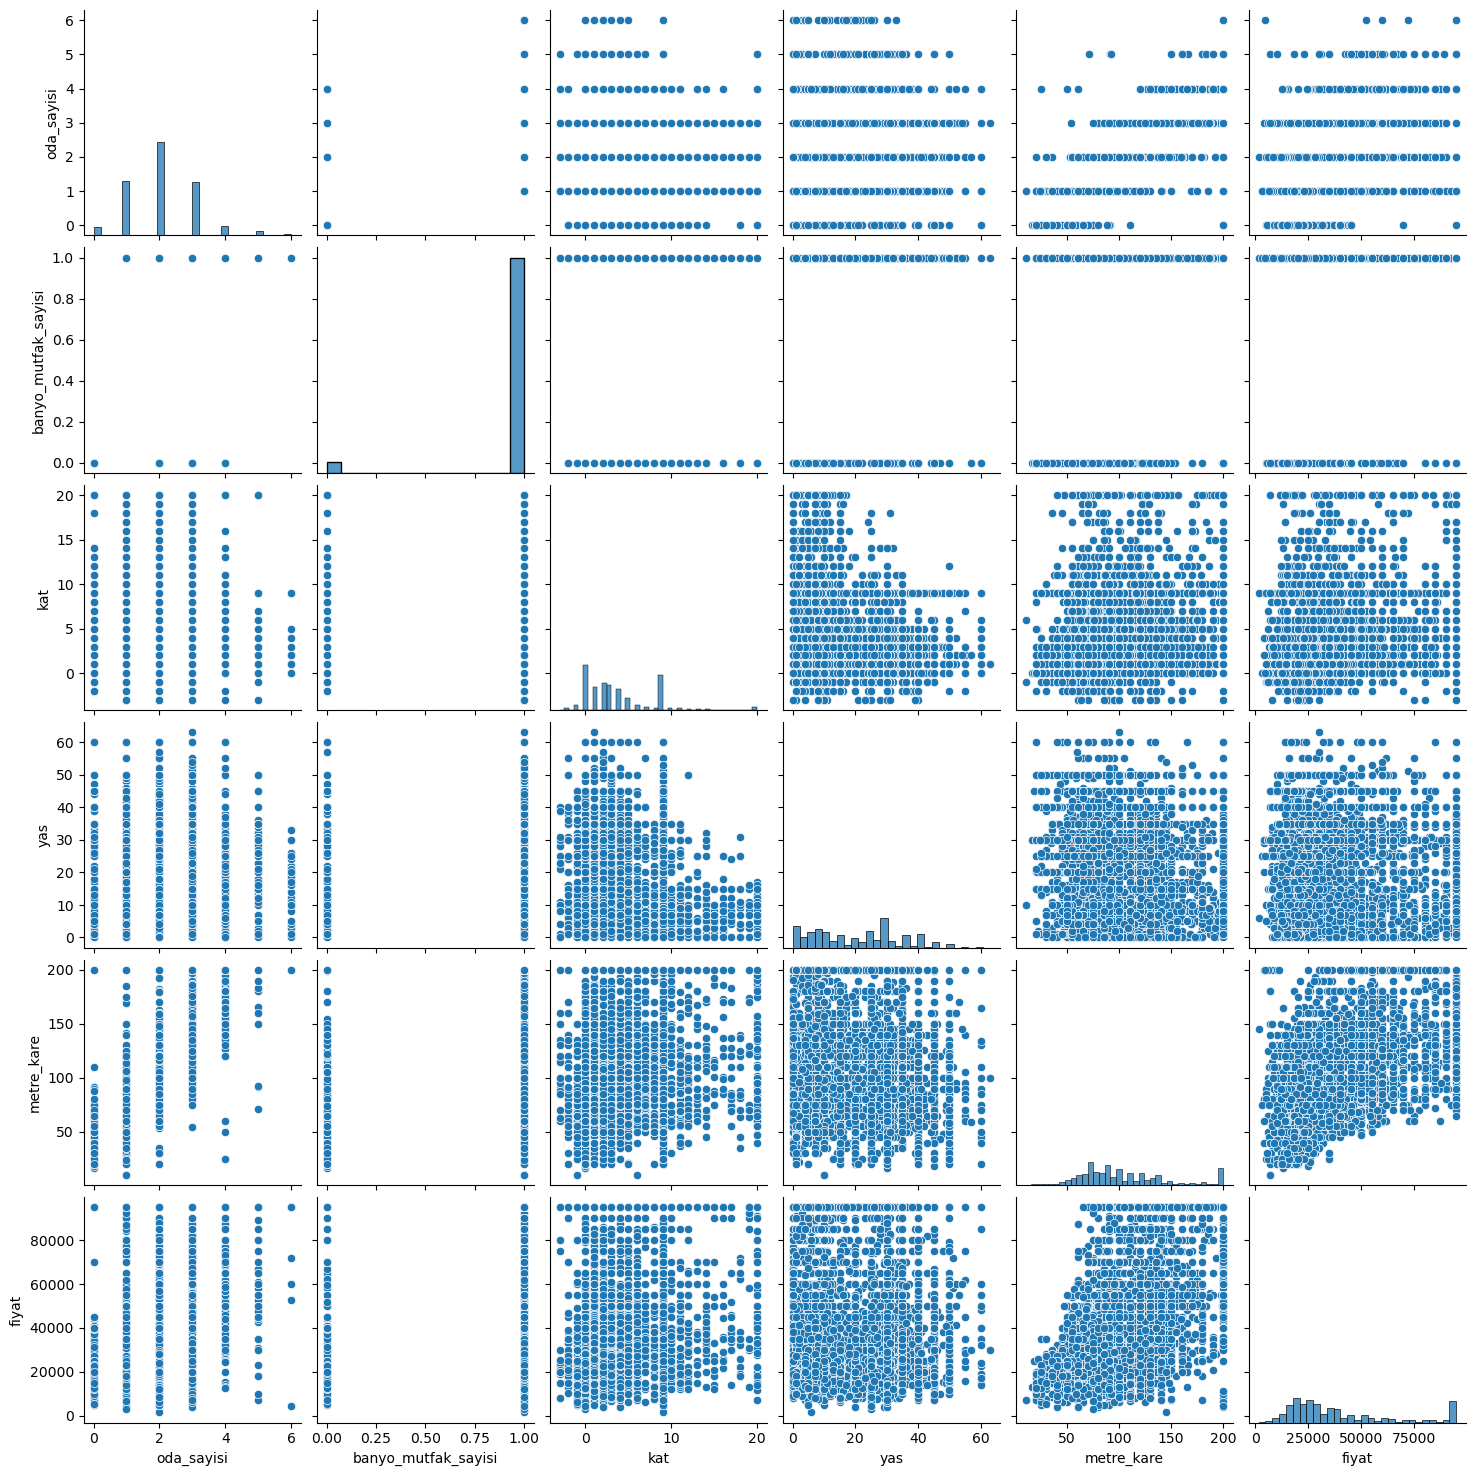

In [ ]:
sea.pairplot(df_raw)